In [2]:
import torch 
import torch.nn.functional as F 
from PIL import Image
import sys
from torchvision import transforms
from model import MLP

In [10]:
def load_model():
    model = MLP()
    model.load_state_dict(torch.load("mnist_mlp.pt"))
    model.eval()
    return model


def predict(img_path):

    image = Image.open(img_path).convert('L').resize((28,28))
    transform = transforms.ToTensor()
    image_tensor = transform(image).unsqueeze(0)
    
    model = load_model()
    with torch.no_grad():
        logits = model(image_tensor)
        probs = F.softmax(logits, dim=1)
        pred = torch.argmax(probs, dim=1).item()
    
    return pred, probs.numpy().tolist()



if __name__ == "__main__":
    
    path = "C:/Users/Manush/Documents/PythonCode/AI_monitor/test_image.png"
    label, prob = predict(path)
    print(f"Prediction: {label}, Probabilities: {prob}")

Prediction: 3, Probabilities: [[4.008492027196553e-08, 2.4549161025788635e-05, 0.003053733380511403, 0.9950503706932068, 6.04666805514853e-09, 4.134676782996394e-05, 9.48658964716742e-07, 5.455166274259682e-07, 0.0018284015823155642, 3.343857191140387e-09]]


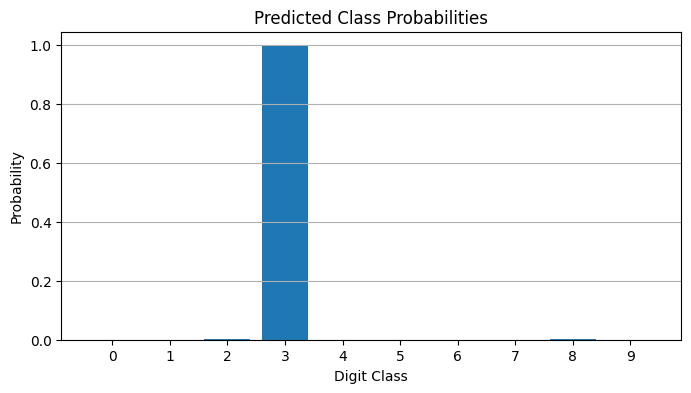

In [11]:
import matplotlib.pyplot as plt

def plot_probabilities(probs):
    probs = probs[0]  # unpack from [[...]]
    classes = list(range(10))

    plt.figure(figsize=(8, 4))
    plt.bar(classes, probs)
    plt.xticks(classes)
    plt.xlabel("Digit Class")
    plt.ylabel("Probability")
    plt.title("Predicted Class Probabilities")
    plt.grid(axis='y')
    plt.show()


plot_probabilities(prob)